<a href="https://colab.research.google.com/github/Garciashk/proyecto_caso_de_negocio/blob/main/Notebook/Churn_clasifiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <td>
    <a target="_blank" href="https://github.com/Garciashk/proyecto_caso_de_negocio"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>


# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Métodos de Analítica II.</strong></h1> 
<h2> Para: Juan Coba Puerto.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Andrea López Gualtero.</br></h2>
<h2>Juan Sebastián Quiroga Bernal.</br></h2>
<h2>Leonardo H. García Díaz</h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.

<h1 style="font-weight:bold">Proyecto Caso de Negocio: Predicción de churn en un Banco</h1>
<br><br>
<h2>Durante el último trimestre, una institución financiera experimentó una disminución del 15% en su base de clientes activos, tras descubrir que muchos de ellos estaban migrando a otras entidades financieras a través de información externa de Datacrédito. En respuesta a esta situación, la institución decidió implementar un programa de beneficios que incluye la eliminación de cuotas de manejo, mejores tasas de interés en productos de crédito de consumo y retiros ilimitados en cajeros automáticos. Para maximizar el impacto de estos beneficios, el equipo de Análisis de Clientes necesita identificar a los clientes con mayor probabilidad de retirarse del banco y priorizar sus ofertas. El objetivo final del equipo es construir un modelo predictivo que ayude a predecir qué clientes pueden abandonar el banco y tomar medidas preventivas para retenerlos.</h2>
<br><br>
<h2>
<ol>
    <li>clientnum : Identificador único del cliente.</li>
    <li>attrition_flag : (Variable Objetivo) Indica si el cliente se fue a otro banco o no.</li>
    <li>customer_age : Edad del cliente.</li>
    <li>gender : Sexo del cliente.</li>
    <li>dependent_count : Número de personas económicamente dependientes del cliente.</li>
    <li>education_level : Nivel de Educación del Cliente.</li>
    <li>marital_status : Estado Civil del Cliente.</li>
    <li>income_category : Categoría de Ingresos del Cliente.</li>
    <li>card_category : Categoría de tarjeta del cliente.</li>
    <li>months_on_book : Antigüedad del cliente.</li>
    <li>total_relationship_count : Total de productos que tiene el cliente con el banco.</li>
    <li>months_inactive_12_mon : Número de meses en que el cliente estuvo inactivo en el último año.</li>
    <li>contacts_count_12_mon : Número de contactos con el cliente en el último año.</li>
    <li>credit_limit : Cupo de crédito del cliente.</li>
    <li>total_revolving_bal : Balance de crédito rotativo del cliente.</li>
    <li>avg_open_to_buy : Promedio de cupo disponible en tarjetas de crédito</li>
    <li>total_amt_chng_q4_q1 : Cambio en el valor total de transacciones entre Q4 y Q1.</li>
    <li>total_trans_amt : Valor total de transacciones</li>
    <li>total_trans_ct : Cantidad de transacciones.</li>
    <li>total_ct_chng_q4_q1 : Cambio en la cantidad total de transacciones entre Q4 y Q1.</li>
    <li>avg_utilization_ratio : Razón de utilización de la tarjeta.</li>
</ol>
</h2>
<br>
<h2>La variable que se busca predecir en el presente notebook es attrition_flag, la cual determina si un cliente se cambio de banco o no. (Binaria).</h2>


El dataframe cuenta con un total de 21 variables (columnas) distintas, al validar si la variable objetivo attrition_flag, se identifica que esta desbalanceado, por lo que al momento de modelar se debe tener presente este aspecto.

# 1. Importar librerias y base de datos.

Se importarán las librerias necesarias para poder usar en el notebook.

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
# importar librerias a ser usadas.
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_palette(sns.color_palette("Paired"))

In [3]:
#Cargar base de datos que fue previamente cargada en Google Drive. 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

bank_churn = '1OZZSqMYtniRlgENtq3lT3DOJQrzcw50Q' 


download = drive.CreateFile({'id': bank_churn}) 
download.GetContentFile('bank_churn.csv')

df = pd.read_csv(r'bank_churn.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

clientnum     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
#validación de distribución de la variable de respuesta.
df.attrition_flag.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: attrition_flag, dtype: float64

En esta situación, podemos observar que la variable de respuesta "attrition_flag" está muy desbalanceada, con un 83.9% de clientes existentes y solo un 16.1% de clientes que han abandonado el banco. Este desequilibrio puede afectar negativamente el rendimiento del modelo predictivo, especialmente si se utiliza un algoritmo de aprendizaje automático que no es robusto ante desequilibrios en los datos. Por lo tanto, puede ser necesario aplicar técnicas de balanceo de datos o utilizar algoritmos específicos que estén diseñados para manejar este tipo de desequilibrios en los datos. En cualquier caso, es importante tener en cuenta este desequilibrio al construir cualquier modelo predictivo con esta variable de respuesta.

# 2. Exploración de datos.

Con el fin de poder identificar relacion entre las 19 variables independientes y la variable de respuesta, con el fin de captar algun patrón que sea preponderante para la separación entre clientes que migrarón a otro banco y los que no.



In [5]:
#Se evidencia que no hay nulos

N, M = df.shape
print("Cantidad de clientes unicos: {}\nNumero de variables: {}".format(N, M))
print('--------------------------------')
print('Cantidad de valores faltantes por variable')
df.isna().sum() 

Cantidad de clientes unicos: 10127
Numero de variables: 21
--------------------------------
Cantidad de valores faltantes por variable


clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

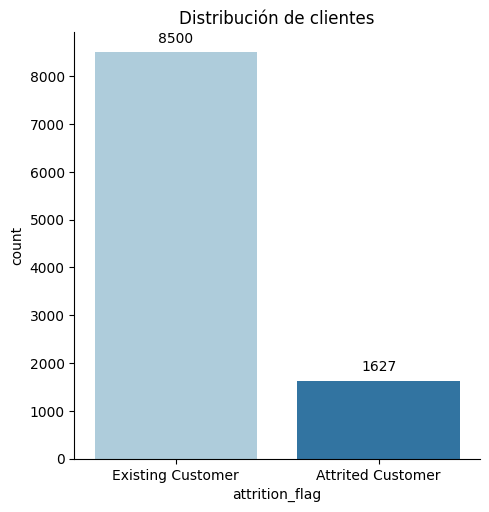

In [6]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(data=df, x='attrition_flag', kind="count")

# set the title
catplot.set(title='Distribución de clientes')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

gender                    F         M
attrition_flag                       
Attrited Customer  0.173572  0.146152
Existing Customer  0.826428  0.853848

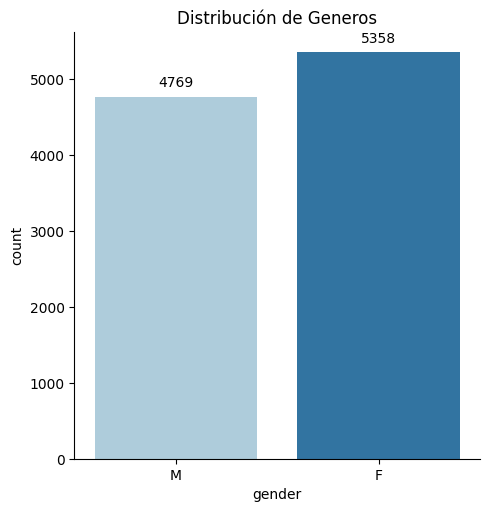

In [7]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='gender', data=df, kind="count")

# set the title
catplot.set(title='Distribución de Generos')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()
pd.crosstab(df['attrition_flag'], [df['gender']], normalize='columns')



La tabla muestra la distribución de la variable de respuesta "attrition_flag" (si un cliente ha dejado de hacer negocios con la empresa) según el género del cliente. Podemos observar que la mayoría de los clientes son "Existing Customer" (cliente existente) y solo una pequeña fracción son "Attrited Customer" (cliente perdido). También podemos notar que la tasa de abandono es un poco más alta para los clientes femeninos en comparación con los clientes masculinos. Sin embargo, se necesitan más análisis y pruebas estadísticas para determinar si esta diferencia es significativa. En general, tener una variable de respuesta desbalanceada es común en muchos conjuntos de datos y puede requerir técnicas especiales de muestreo y modelado para abordar el desequilibrio.

In [8]:
# Distribución por nivel educativo.
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: education_level, dtype: float64

La variable "education_level" tiene un total de 7 categorías diferentes, donde la mayoría de los clientes tienen un nivel de graduado (30.89%) o de escuela secundaria (19.88%). Una proporción significativa de los clientes tienen educación desconocida (15%) o sin educación (14.68%), seguido de aquellos con nivel universitario (10%), posgrado (5.1%) y doctorado (4.45%). Esta información puede ser útil para entender la distribución de los niveles de educación de los clientes y cómo esto puede influir en su comportamiento bancario.

In [9]:
pd.crosstab(df['attrition_flag'], [df['education_level']], normalize='columns', margins=True)


education_level     College  Doctorate  Graduate  High School  Post-Graduate  \
attrition_flag                                                                 
Attrited Customer  0.152024   0.210643  0.155691     0.152012       0.178295   
Existing Customer  0.847976   0.789357  0.844309     0.847988       0.821705   

education_level    Uneducated   Unknown      All  
attrition_flag                                    
Attrited Customer    0.159381  0.168532  0.16066  
Existing Customer    0.840619  0.831468  0.83934

Se puede observar que la tasa de rotación (attrition) es más alta para los clientes con niveles de educación más altos, especialmente para aquellos con un doctorado. Por otro lado, los clientes con un nivel de educación más bajo (como la educación secundaria y sin educación) tienen una tasa de rotación más baja. Cabe señalar que el nivel de educación es solo una variable y hay muchas otras posibles variables que podrían influir en la tasa de rotación.

In [10]:
pd.crosstab(df['gender'], [df['education_level']], normalize='columns', margins=True)


education_level   College  Doctorate  Graduate  High School  Post-Graduate  \
gender                                                                       
F                0.525173   0.569845  0.533887     0.510681        0.50969   
M                0.474827   0.430155  0.466113     0.489319        0.49031   

education_level  Uneducated   Unknown       All  
gender                                           
F                  0.535306  0.534562  0.529081  
M                  0.464694  0.465438  0.470919

Se observa que los segmentos educativos de Post-graduate y Doctorate tienen una proporción del 5% y 4%, respectivamente, y ambos conservan una proporción similar en relación a la variable de respuesta. Por lo tanto, con el fin de reducir la variabilidad y sumando un total de 9%, dichos grupos serán de interés para nuestro análisis debido a su mayor proporción.

Además, es interesante notar que en el segmento educativo de clientes con Doctorado, la proporción de mujeres supera el 52% del grupo en general.

In [11]:
df['education_level']= np.where(df['education_level'] == 'Doctorate', 'Post-Graduate', df['education_level'])
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     9.548731
Name: education_level, dtype: float64

Debido a la gran cantidad de variables, se realizara un pair plot, diferenciados por el genero, para identificar mejor que variables podrian servir como predictoras debido a su poder de separación.

marital_status     Divorced   Married    Single  Unknown      All
attrition_flag                                                   
Attrited Customer  0.161765  0.151269  0.169414  0.17223  0.16066
Existing Customer  0.838235  0.848731  0.830586  0.82777  0.83934

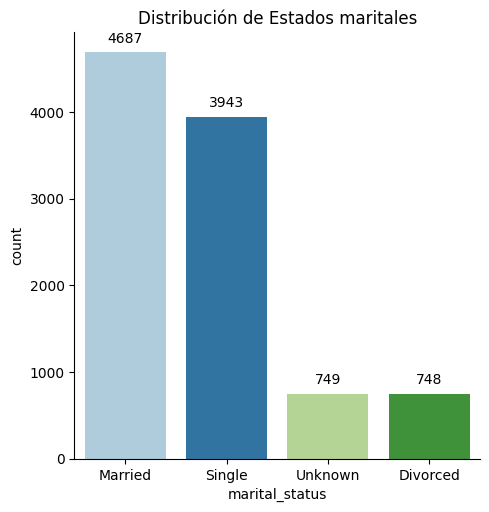

In [12]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='marital_status', data=df, kind="count")

# set the title
catplot.set(title='Distribución de Estados maritales')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['marital_status']], normalize='columns', margins=True)


Se observa que no hay grandes diferencias en la proporción de attrition_flag (cliente attrited o cliente existente) en función del estado civil, ya que en todos los estados civiles la proporción de clientes existentes es mayor que la de clientes attrited. Sin embargo, cabe destacar que los clientes que no tienen un estado civil definido ("Unknown") tienen una proporción ligeramente más alta de clientes attrited en comparación con otros estados civiles.

income_category     $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
attrition_flag                                                        
Attrited Customer  0.173315     0.151397     0.134807      0.157655   
Existing Customer  0.826685     0.848603     0.865193      0.842345   

income_category    Less than $40K   Unknown      All  
attrition_flag                                        
Attrited Customer        0.171862  0.168165  0.16066  
Existing Customer        0.828138  0.831835  0.83934

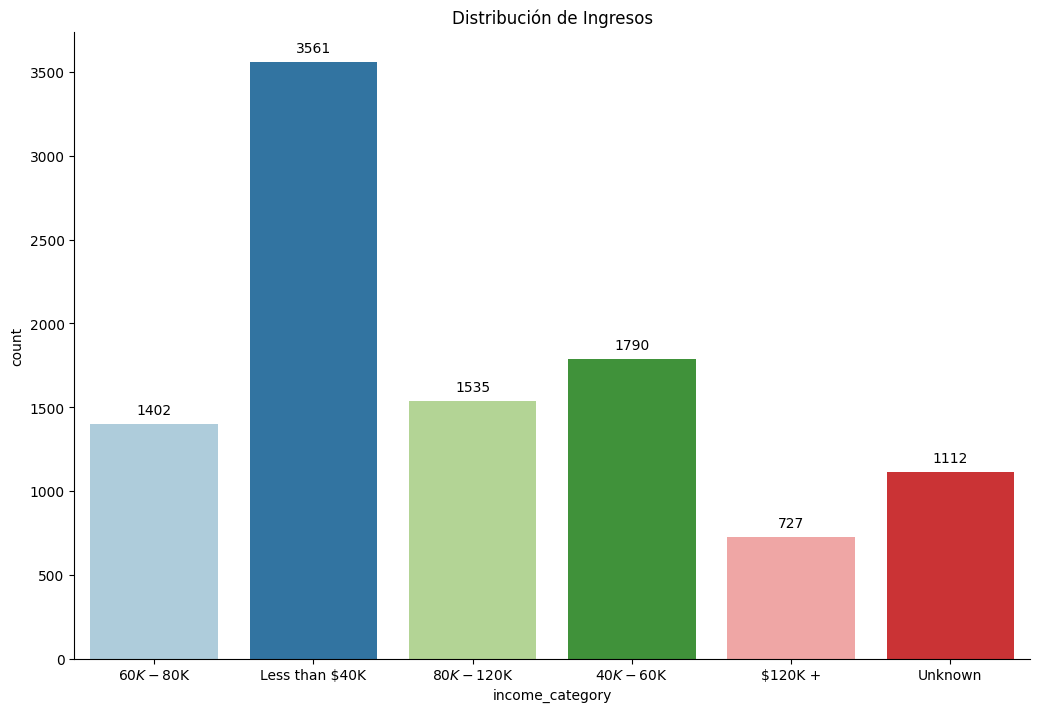

In [13]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='income_category', data=df, kind="count", height=7, aspect=1.5)

# set the title
catplot.set(title='Distribución de Ingresos')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['income_category']], normalize='columns', margins=True)

Se puede observar que no hay una diferencia significativa entre las proporciones de los distintos niveles de ingresos y la variable de respuesta, con una proporción de alrededor del 16% para la variable "Attrited Customer" en cada categoría de ingresos. Sin embargo, las proporciones cambian en los segmentos "Less than $40K" y "Unknown", siendo el primero el que tiene la proporción más alta en "Attrited Customer". Por lo tanto, se podría considerar enfocar las estrategias de retención en clientes con ingresos menores a $40K y en aquellos cuyo ingreso no se conoce, para disminuir la proporción de clientes que abandonan la empresa.

card_category          Blue      Gold  Platinum    Silver      All
attrition_flag                                                    
Attrited Customer  0.160979  0.181034      0.25  0.147748  0.16066
Existing Customer  0.839021  0.818966      0.75  0.852252  0.83934

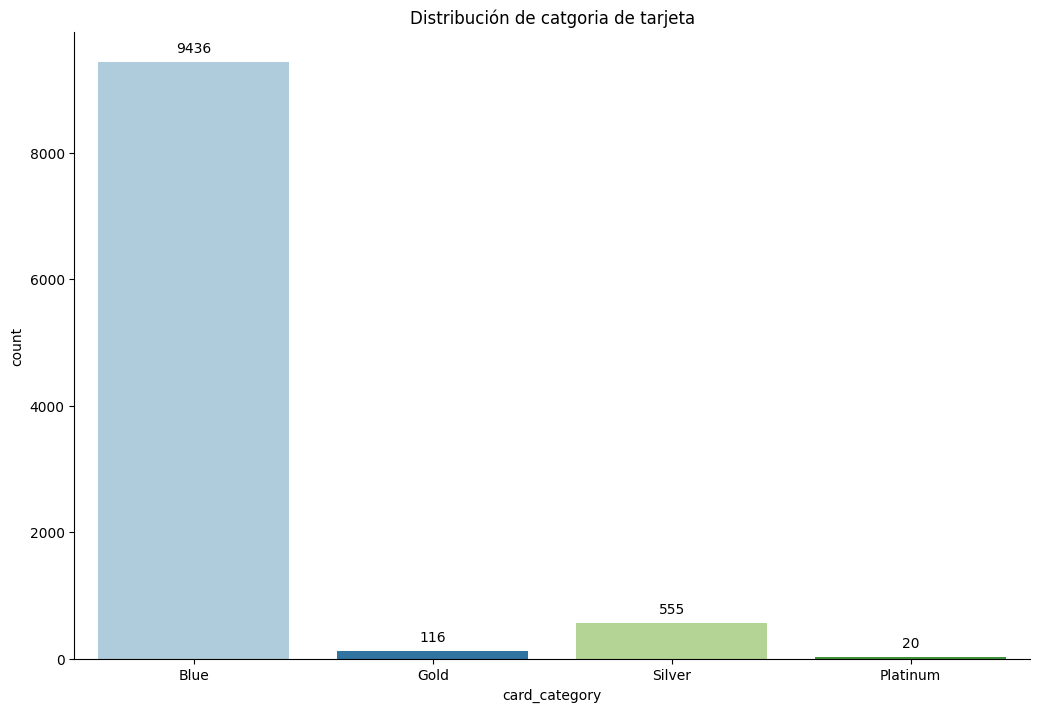

In [14]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='card_category', data=df, kind="count", height=7, aspect=1.5)

# set the title
catplot.set(title='Distribución de catgoria de tarjeta')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')


# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['card_category']], normalize='columns', margins=True)


Se observa que la mayoría de los clientes tienen una tarjeta de crédito de categoría "Blue", sin embargo, los clientes que tienen tarjetas de categoría "Platinum" y "Gold" son más propensos a abandonar el servicio. Además, los clientes que tienen una tarjeta de crédito de categoría "Silver" tienen una tasa de abandono inferior al promedio.

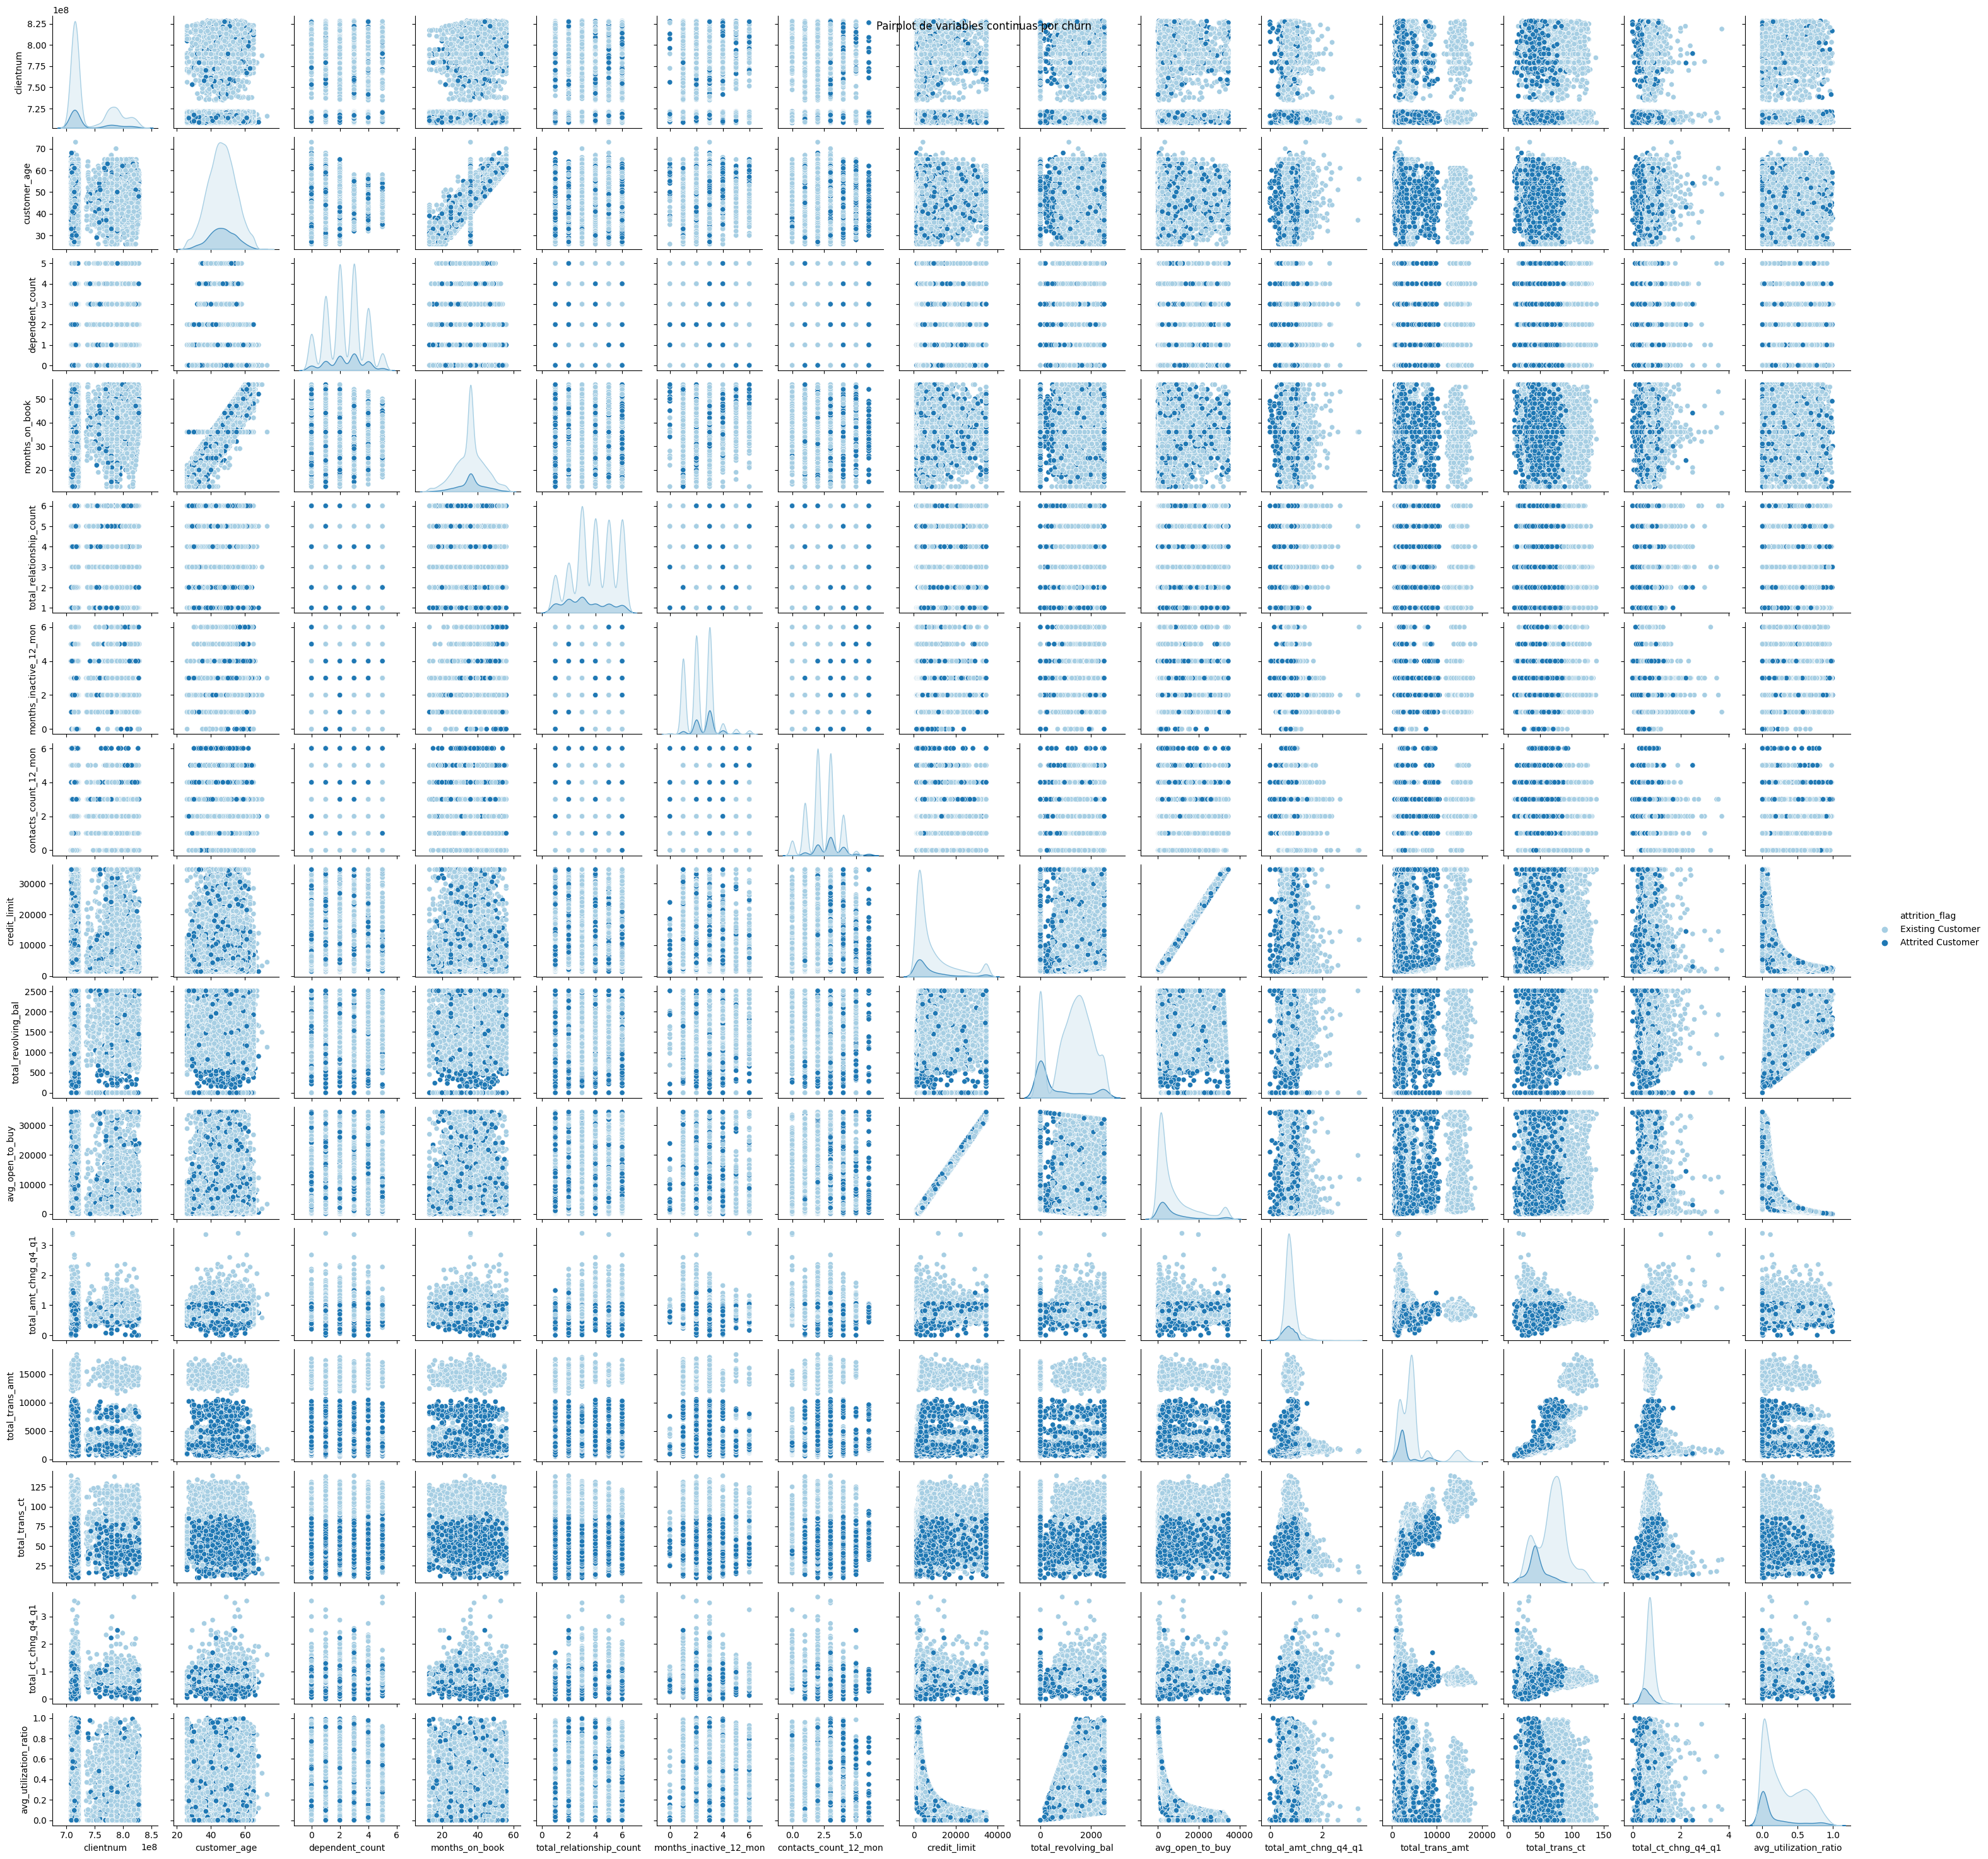

In [15]:
import seaborn as sns

# create the pairplot
pairplot = sns.pairplot(data=df, hue='attrition_flag',  height=2)

# set the title
pairplot.fig.suptitle('Pairplot de variables continuas por churn')

# show the plot
pairplot.fig.show()


Se identifica que la cantidad de transacciones puede ser un factor importante para clasificar ya que se puede inferir que aproximandamente bajo las 90 transacciones, principalmente las variables que expresan este comportamiento se identifica como habilidad predicitiva. 

<ipython-input-16-e6dbf1c25051>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


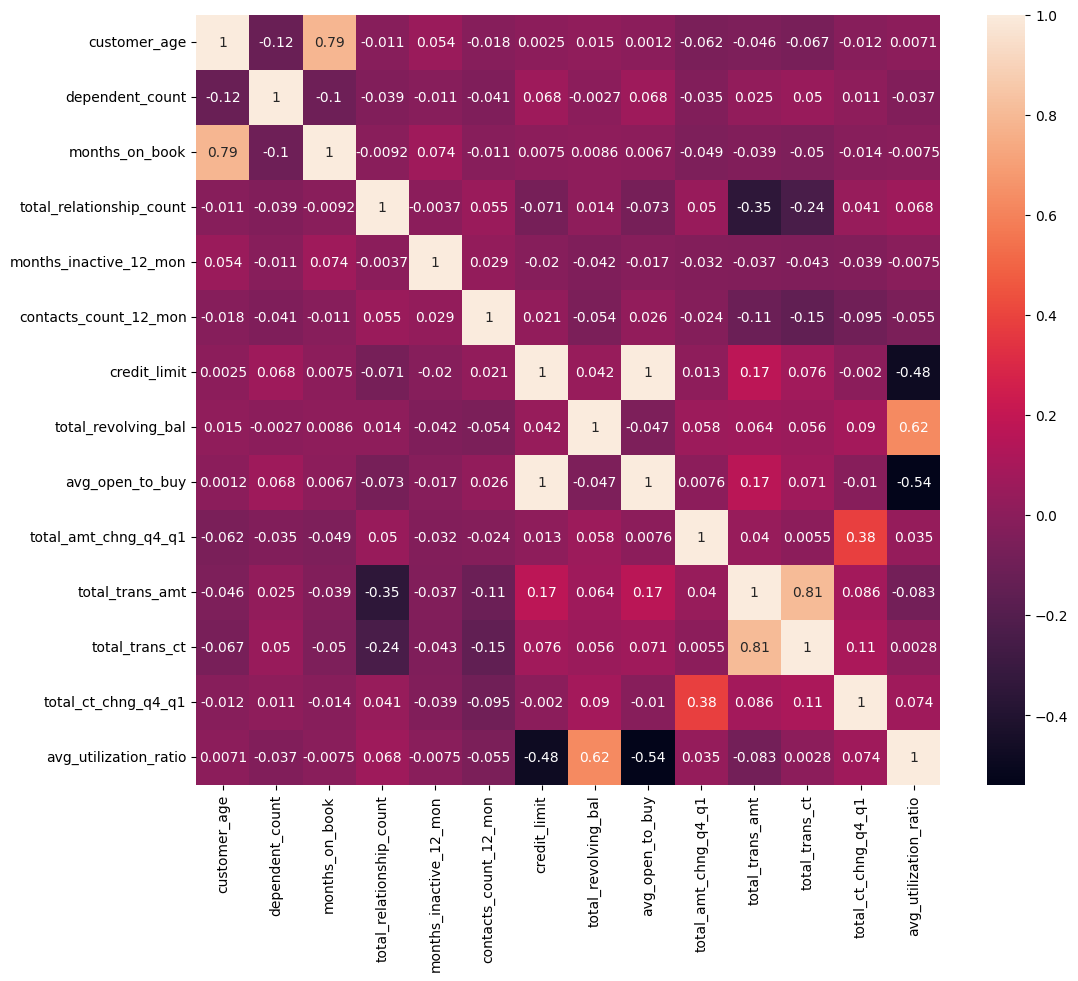

In [16]:
#Matriz de correlaciones
df.drop(['clientnum'], axis=1,inplace = True)
corr_df=df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()


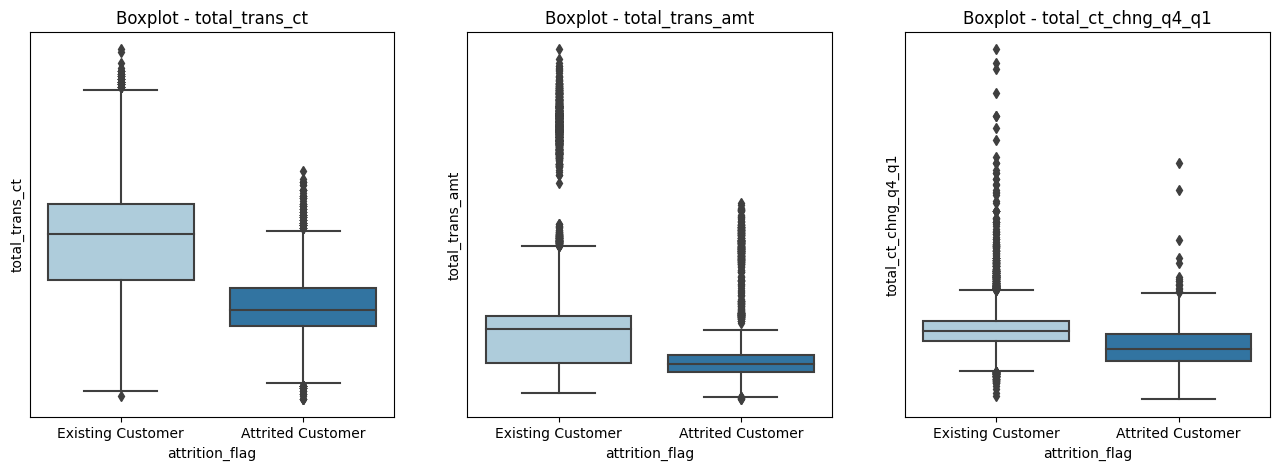

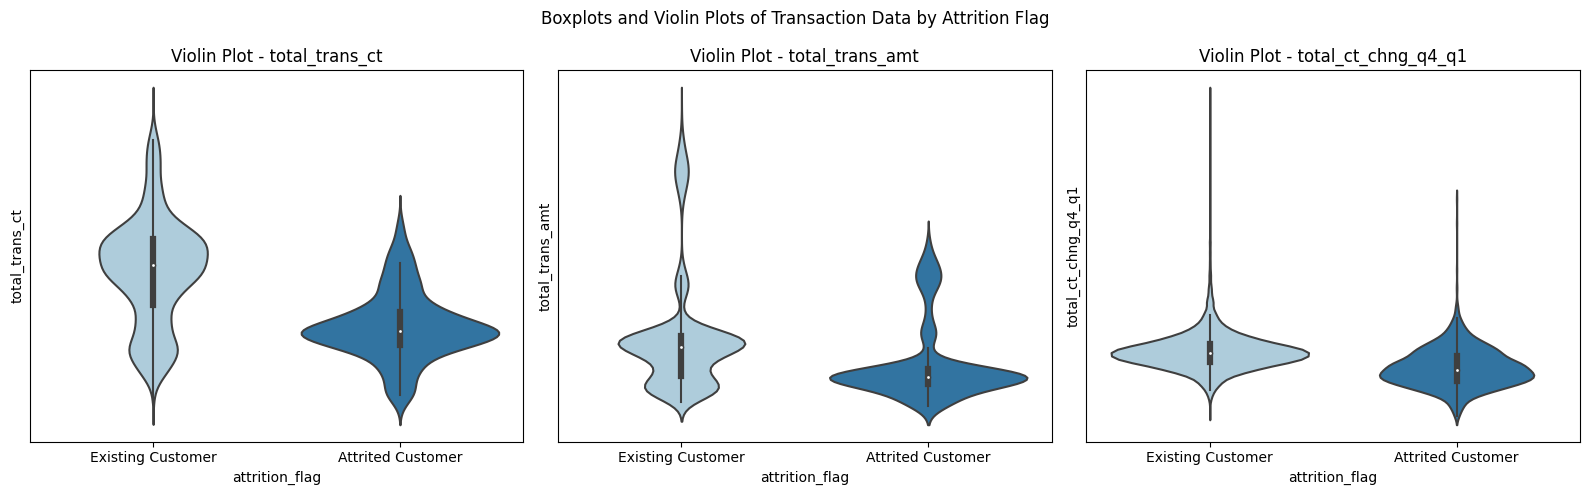

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots for the boxplots
fig, axes_box = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Create a list of tuples with the plot title, data column, and subplot position for the boxplots
plots_box = [('Boxplot - total_trans_ct', 'total_trans_ct', 0),
             ('Boxplot - total_trans_amt', 'total_trans_amt', 1),
             ('Boxplot - total_ct_chng_q4_q1', 'total_ct_chng_q4_q1', 2)]

# Loop through the boxplot plots and add them to the subplots
for plot in plots_box:
    title, col, pos = plot
    ax = axes_box[pos]
    sns.boxplot(data=df, x='attrition_flag', y=col, ax=ax)
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_yticks([])
    
# Set up the subplots for the violin plots
fig, axes_violin = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Create a list of tuples with the plot title, data column, and subplot position for the violin plots
plots_violin = [('Violin Plot - total_trans_ct', 'total_trans_ct', 0),
                ('Violin Plot - total_trans_amt', 'total_trans_amt', 1),
                ('Violin Plot - total_ct_chng_q4_q1', 'total_ct_chng_q4_q1', 2)]

# Loop through the violin plots and add them to the subplots
for plot in plots_violin:
    title, col, pos = plot
    ax = axes_violin[pos]
    sns.violinplot(data=df, x='attrition_flag', y=col, ax=ax)
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_yticks([])
    
# Add a main title to the figure
fig.suptitle('Boxplots and Violin Plots of Transaction Data by Attrition Flag')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()


La misma inferencia que se persive en el pair plot, las transaciones tienen un comportamiento distinto entre los dos grupos de nuestro analsis, se tiene que validar a profundidad para evitar ser redundates y agregar mas dimenciones sin necesidad.

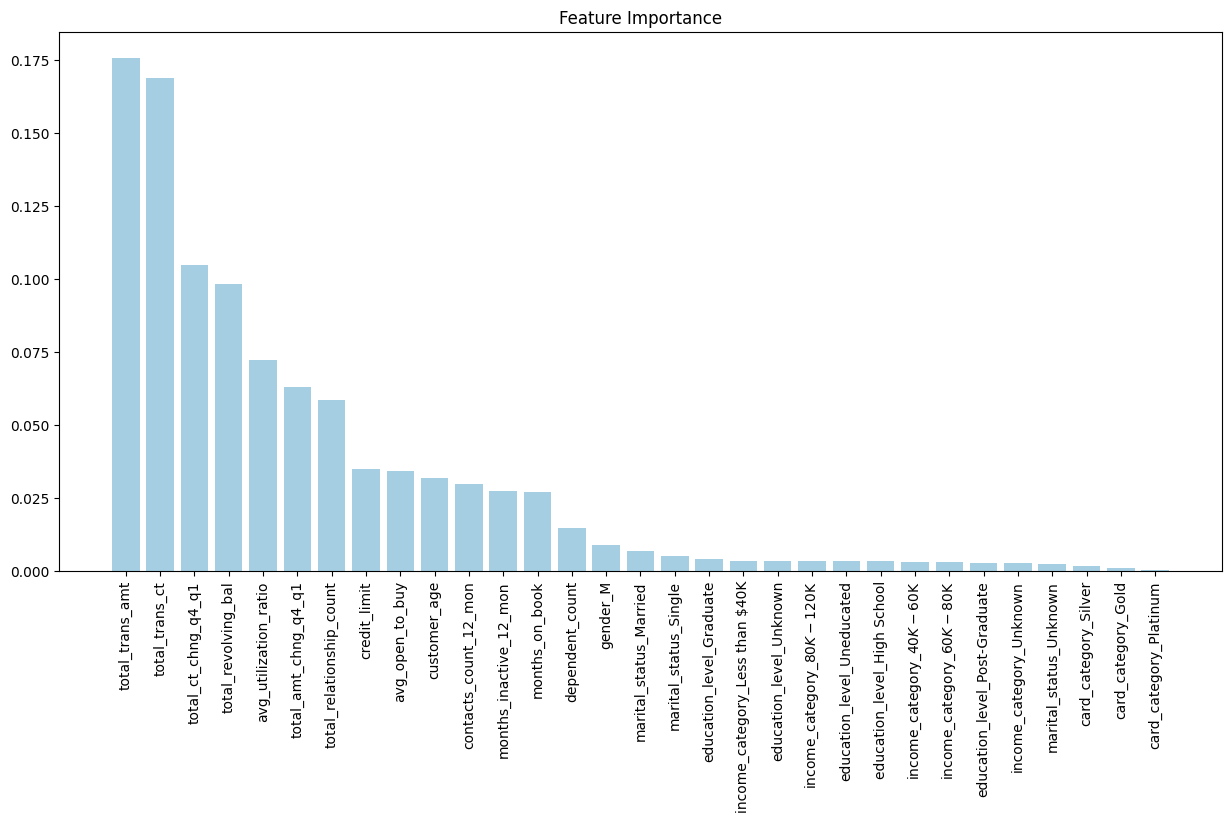

1. total_trans_amt: 0.176
2. total_trans_ct: 0.169
3. total_ct_chng_q4_q1: 0.105
4. total_revolving_bal: 0.098
5. avg_utilization_ratio: 0.072
6. total_amt_chng_q4_q1: 0.063
7. total_relationship_count: 0.058
8. credit_limit: 0.035
9. avg_open_to_buy: 0.034
10. customer_age: 0.032
11. contacts_count_12_mon: 0.030
12. months_inactive_12_mon: 0.027
13. months_on_book: 0.027
14. dependent_count: 0.015
15. gender_M: 0.009
16. marital_status_Married: 0.007
17. marital_status_Single: 0.005
18. education_level_Graduate: 0.004
19. income_category_Less than $40K: 0.003
20. education_level_Unknown: 0.003
21. income_category_$80K - $120K: 0.003
22. education_level_Uneducated: 0.003
23. education_level_High School: 0.003
24. income_category_$40K - $60K: 0.003
25. income_category_$60K - $80K: 0.003
26. education_level_Post-Graduate: 0.003
27. income_category_Unknown: 0.003
28. marital_status_Unknown: 0.002
29. card_category_Silver: 0.002
30. card_category_Gold: 0.001
31. card_category_Platinum: 0.0

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


X = df.drop('attrition_flag', axis=1)
y = df.attrition_flag
X = pd.get_dummies(X, drop_first=True)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# load data
X = df.drop('attrition_flag', axis=1)
y = df.attrition_flag

# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# calculate feature importances and sort them
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

# plot feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), X.columns[sorted_indices], rotation=90)
plt.show()


for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[index]}: {importances[index]:.3f}")


Se muestra la importancia relativa de cada una de las variables de entrada (features) en la predicción de la variable objetivo (target) por un modelo de Random Forest. La lista va en orden descendente de importancia, siendo la variable "total_trans_amt" la que tiene el mayor peso en la predicción, seguida por "total_trans_ct" y "total_ct_chng_q4_q1". Esto significa que estas variables tienen un mayor impacto en la predicción del modelo que las variables que están más abajo en la lista.

Es importante tener en cuenta que esta lista solo representa la importancia relativa de las variables en el modelo específico que se usó para crearla y que puede haber otros modelos o métodos de análisis de datos donde la importancia de las variables sea diferente. Además, la lista no indica si las variables son directamente causales de la variable objetivo o simplemente están correlacionadas con ella. Por lo tanto, es importante interpretar esta lista en el contexto del problema específico y no tomarla como una verdad absoluta.

# 3. Transformación de datos para modelamiento

Se define como variable de respusta attrition_flag, y como independientes el restante, se procede a dividir en un 70%, 30% el train y test.

In [19]:
y = df['attrition_flag']
X = df.drop(columns = 'attrition_flag')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
y_train.value_counts()/len(y_train)

Existing Customer    0.840435
Attrited Customer    0.159565
Name: attrition_flag, dtype: float64

In [22]:
y_test.value_counts()/len(y_test)

Existing Customer    0.836788
Attrited Customer    0.163212
Name: attrition_flag, dtype: float64

In [23]:
y_train

415     Existing Customer
3749    Existing Customer
9295    Existing Customer
8290    Existing Customer
7672    Attrited Customer
              ...        
5734    Attrited Customer
5191    Attrited Customer
5390    Existing Customer
860     Existing Customer
7270    Existing Customer
Name: attrition_flag, Length: 7088, dtype: object

In [24]:
y_train = y_train.replace({'Existing Customer': 0, 'Attrited Customer': 1})
y_test = y_test.replace({'Existing Customer': 0, 'Attrited Customer': 1})

In [25]:
y_train

415     0
3749    0
9295    0
8290    0
7672    1
       ..
5734    1
5191    1
5390    0
860     0
7270    0
Name: attrition_flag, Length: 7088, dtype: int64

In [26]:
categorical_columns = X_train.select_dtypes(exclude = [int, float]).columns
numerical_columns = X_train.select_dtypes(include = [int, float]).columns

In [27]:
X_train = pd.get_dummies(X_train, columns = categorical_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = categorical_columns, drop_first = True)

In [28]:
X_train.shape

(7088, 31)

In [29]:
X_test.head()

customer_age  dependent_count  months_on_book  total_relationship_count  \
3781            48                3              39                         4   
2922            59                1              53                         5   
5070            37                2              36                         4   
7246            47                3              36                         4   
623             42                3              33                         3   

      months_inactive_12_mon  contacts_count_12_mon  credit_limit  \
3781                       3                      4        2991.0   
2922                       5                      4        2192.0   
5070                       3                      3        1734.0   
7246                       2                      3        4786.0   
623                        3                      2        3714.0   

      total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  ...  \
3781                 1508           1483.0                 0.703  ...   
2922                 1569            623.0                 0.706  ...   
5070                  987            747.0                 0.879  ...   
7246                 1516           3270.0                 0.940  ...   
623                  2170           1544.0                 0.524  ...   

      marital_status_Single  marital_status_Unknown  \
3781                      1                       0   
2922                      1                       0   
5070                      0                       0   
7246                      0                       0   
623                       1                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
3781                            0                            0   
2922                            0                            0   
5070                            0                            0   
7246                            1                            0   
623                             0                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
3781                             0                               1   
2922                             0                               1   
5070                             0                               1   
7246                             0                               0   
623                              1                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
3781                        0                   0                       0   
2922                        0                   0                       0   
5070                        0                   0                       0   
7246                        0                   0                       0   
623                         0                   0                       0   

      card_category_Silver  
3781                     0  
2922                     0  
5070                     0  
7246                     0  
623                      0  

[5 rows x 31 columns]

# 4. Modelamiento


## SVM Lineal (Default)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

np.random.seed(10)

# Pasos de Pre-Procesamiento y Modelo
model_steps = []
model_steps.append(('MinMaxScaling', MinMaxScaler())) # escalar los datos
model_steps.append(('SVM', SVC(probability=True))) # SVM con probabilidades 

# Modelo utilizando el Pipeline
clf_default = Pipeline(model_steps, verbose=False)

In [31]:
clf_default.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaling', MinMaxScaler()),
                ('SVM', SVC(probability=True))])

In [32]:
# Predicción de las clases
y_pred_default = clf_default.predict(X_test)

# Predicción de las probabilidades
y_pred_default_proba = clf_default.predict_proba(X_test)[:,1]

In [33]:
y_pred_default_proba

array([0.06251248, 0.04122036, 0.01640654, ..., 0.07224628, 0.04383301,
       0.0776494 ])

In [34]:
# Evaluación del desempeño del modelo en test -- Accuracy, Matriz de Confusión, F1, Precisión, Recall...
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2543
           1       0.86      0.49      0.63       496

    accuracy                           0.90      3039
   macro avg       0.89      0.74      0.79      3039
weighted avg       0.90      0.90      0.89      3039



In [35]:
# Cálculo de la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

false_positives_rate, true_positives_rate, threshold = roc_curve(y_test, y_pred_default_proba)

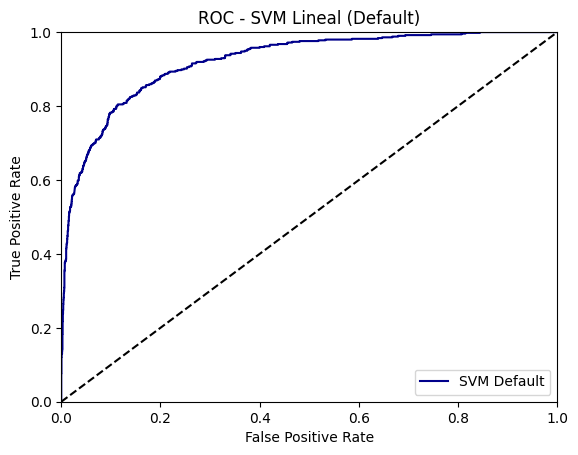

In [36]:
# Curva ROC
plt.title('ROC - SVM Lineal (Default)')

plt.plot(false_positives_rate, true_positives_rate, color='darkblue', label = 'SVM Default')

plt.plot([0, 1], color='black', ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

In [37]:
# AUC del Modelo
print('AUC Score: ', roc_auc_score(y_test, y_pred_default_proba))

AUC Score:  0.9216754087755127


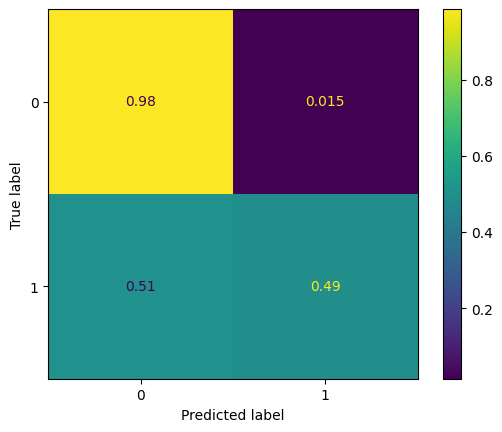

In [38]:
# Matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred_default, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

## SVM Kernels - Búsqueda de Hiperparámetros

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# Hiperparametros a probar

hyperparameters_grid = [{
    'SVM__kernel': ['linear', 'poly', 'rbf'],  # Lista de kernels
    'SVM__C': [0.1, 1, 5, 10], # Lista de valores de C para regularización
    'SVM__gamma': [0.05, 1.0, 1.3, 'auto'] # Lista de valores de gamma para los kernels
}]

In [41]:
# Definir y ajustar el modelo para enconcrar los mejores parámetros
Hyper_SVM = Pipeline(model_steps, verbose=False)
grid_search = GridSearchCV(Hyper_SVM, hyperparameters_grid, cv=5,  n_jobs=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaling', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=3,
             param_grid=[{'SVM__C': [0.1, 1, 5, 10],
                          'SVM__gamma': [0.05, 1.0, 1.3, 'auto'],
                          'SVM__kernel': ['linear', 'poly', 'rbf']}])

In [42]:
# Selección del mejor modelo
cv_performance = grid_search.best_score_
test_performance = grid_search.score(X_test, y_test)

In [43]:
print('Best parameter: {}'.format(str(grid_search.best_params_)))
print('Cross-validation accuracy score: {0:0.3f}'.format(cv_performance))

Best parameter: {'SVM__C': 10, 'SVM__gamma': 0.05, 'SVM__kernel': 'rbf'}
Cross-validation accuracy score: 0.916


In [44]:
# Entrenamiento del Mejor Modelo
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaling', MinMaxScaler()),
                ('SVM', SVC(C=10, gamma=0.05, probability=True))])

In [45]:
# Realizar predicciones
y_pred_hp = best_model.predict(X_test)
y_pred_prob_hp = best_model.predict_proba(X_test)[:,1]

In [46]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_prob_hp))

AUC Score:  0.9366960853957098


In [47]:
# ROC AUC
false_positives_rate_hp, true_positives_rate_hp, threshold = roc_curve(y_test, y_pred_prob_hp)

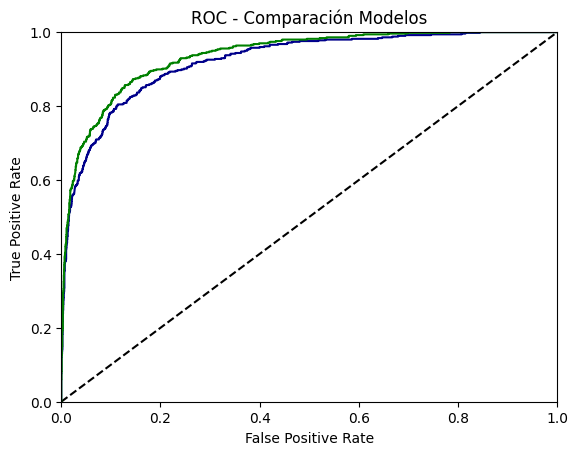

In [48]:
plt.title('ROC - Comparación Modelos')
plt.plot(false_positives_rate, true_positives_rate, color='darkblue', label = 'SVM Default')
plt.plot([0, 1], color='black', ls="--")
plt.plot(false_positives_rate_hp, true_positives_rate_hp, color='green', label = 'Tuned SVM')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [49]:
print(classification_report(y_test, y_pred_hp))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2543
           1       0.83      0.59      0.69       496

    accuracy                           0.91      3039
   macro avg       0.88      0.78      0.82      3039
weighted avg       0.91      0.91      0.91      3039



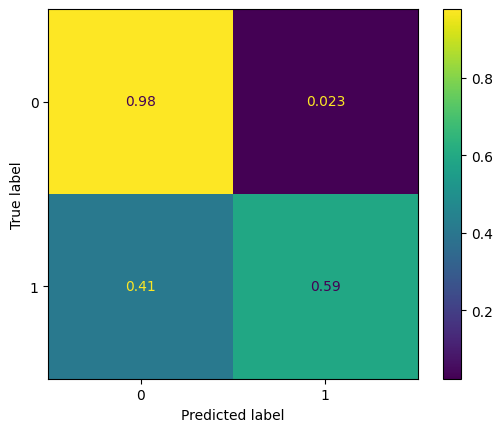

In [50]:
# Matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred_hp, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Grid de hiper parámetros para búsqueda
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
# Definir y ajustar el modelo para enconcrar los mejores parámetros
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, verbose=2, n_jobs=3,  scoring='f1_macro')
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro', verbose=2)

In [54]:
# Selección y predicción del Mejor Modelo
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2543
           1       0.93      0.76      0.84       496

    accuracy                           0.95      3039
   macro avg       0.94      0.88      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [56]:
# ROC AUC
false_positives_rate_rf, true_positives_rate_rf, threshold_rf = roc_curve(y_test, y_pred_rf_proba)

In [57]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_rf_proba))

AUC Score:  0.9876011632184492


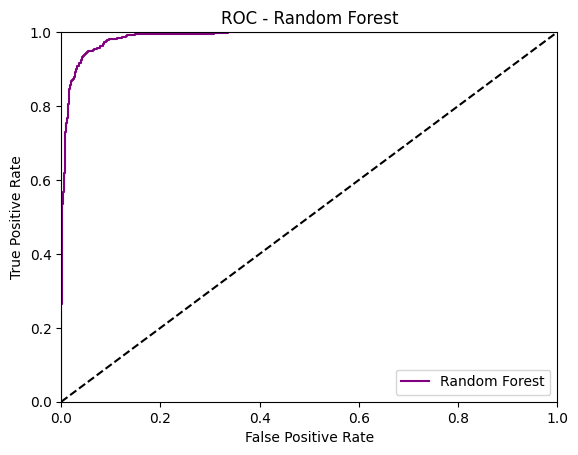

In [58]:
# Grafica de la curva ROC
plt.title('ROC - Random Forest')

plt.plot(false_positives_rate_rf, true_positives_rate_rf, color='purple', label = 'Random Forest')

plt.plot([0, 1], color='black',ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

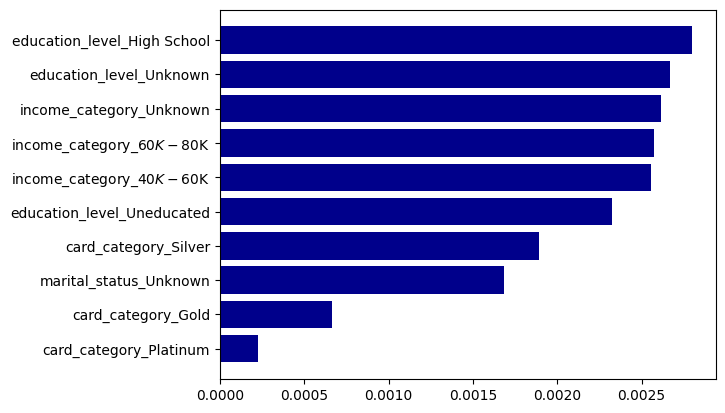

In [59]:
# Importancia de variables
sorted_idx = best_rf.feature_importances_.argsort()[:10]
plt.barh(X_train.columns[sorted_idx], best_rf.feature_importances_[sorted_idx], color='darkblue')
plt.show()

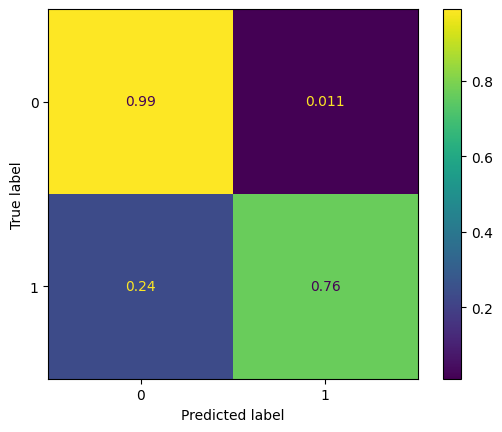

In [60]:
# Matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred_rf, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

## XGBoost

In [61]:
from xgboost import XGBClassifier, plot_importance

In [62]:
# Grid de hiper parámetros para búsqueda
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5,],
    'n_estimators': [50, 100, 200],
    'subsample': [ 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [63]:
# Definir y ajustar el modelo para enconcrar los mejores parámetros
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, verbose=10, n_jobs=3,  scoring='f1_macro')
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1.0]},
             scoring='f1_macro', verbose=10)

In [64]:
# Selección y predicción del Mejor Modelo
best_xgb = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_proba = best_xgb.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [65]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [66]:
# ROC AUC
false_positives_rate_xgb, true_positives_rate_xgb, threshold_xgb = roc_curve(y_test, y_pred_xgb_proba)

In [67]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_xgb_proba))

AUC Score:  0.9936067382948766


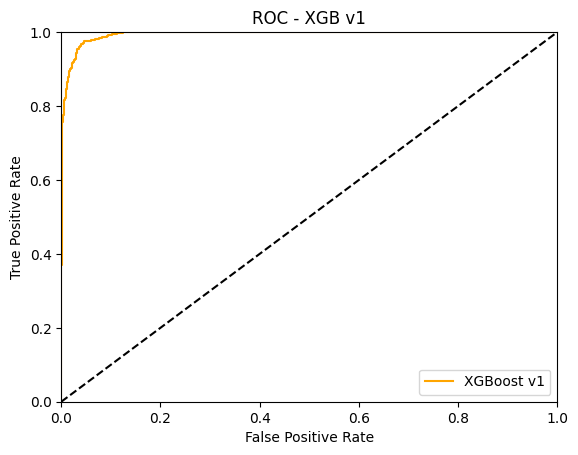

In [68]:
# Curva ROC
plt.title('ROC - XGB v1')

plt.plot(false_positives_rate_xgb, true_positives_rate_xgb, color='orange', label = 'XGBoost v1')

plt.plot([0, 1], color='black', ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

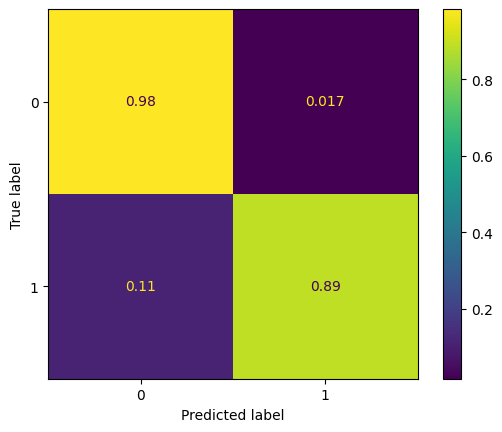

In [69]:
# Matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred_xgb, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

## XGB with Recursive Feature Elimination

In [70]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import  StratifiedKFold

In [71]:
# Definir CV y Recursive Feature Elimination with Cross-Validation 
cv = StratifiedKFold(n_splits=5)
rfe = RFECV(best_xgb, step=1, cv=cv, scoring='accuracy', verbose=2)
rfe.fit(X_train, y_train)

# Train and test XGBoost with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
best_xgb.fit(X_train_rfe, y_train)

Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [72]:
# Realizar predicciones con el modelo 
y_pred_xgb_rfe = best_xgb.predict(X_test_rfe)
y_pred_xgb_rfe_proba = best_xgb.predict_proba(X_test_rfe)[:, 1]

In [73]:
print(classification_report(y_test, y_pred_xgb_rfe))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [74]:
# ROC AUC
false_positives_rate_xgb_rfe, true_positives_rate_xgb_rfe, threshold_xgb_rfe = roc_curve(y_test, y_pred_xgb_rfe_proba)

In [75]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_xgb_rfe_proba))

AUC Score:  0.9936899838899953


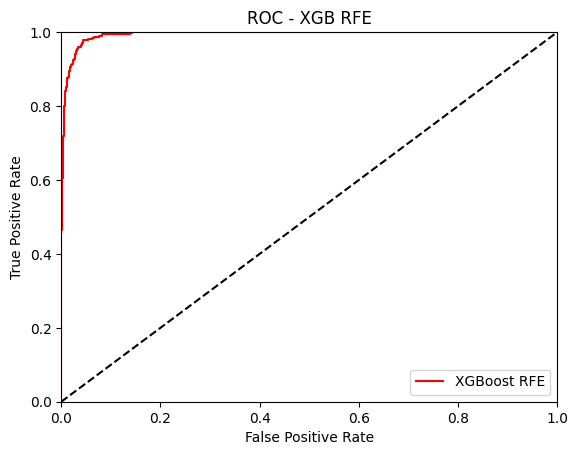

In [76]:
# Curva ROC

plt.title('ROC - XGB RFE')

plt.plot(false_positives_rate_xgb_rfe, true_positives_rate_xgb_rfe, color='red', label = 'XGBoost RFE')

plt.plot([0, 1], color='black', ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

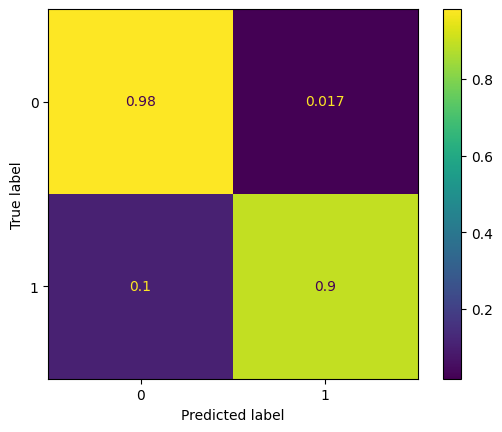

In [77]:
# Matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred_xgb_rfe, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [78]:
# Número óptimo de variables
print(f"Optimal number of features: {rfe.n_features_}")
print("Selected features:")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(f"- {X_train.columns[i]}")

Optimal number of features: 26
Selected features:
- customer_age
- dependent_count
- months_on_book
- total_relationship_count
- months_inactive_12_mon
- contacts_count_12_mon
- credit_limit
- total_revolving_bal
- avg_open_to_buy
- total_amt_chng_q4_q1
- total_trans_amt
- total_trans_ct
- total_ct_chng_q4_q1
- avg_utilization_ratio
- gender_M
- education_level_Graduate
- education_level_High School
- education_level_Post-Graduate
- education_level_Uneducated
- marital_status_Married
- marital_status_Single
- marital_status_Unknown
- income_category_$40K - $60K
- income_category_$60K - $80K
- income_category_$80K - $120K
- income_category_Less than $40K


In [79]:
# Seleccion de las mejores variables
selected_feature_names = [X_train.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]]

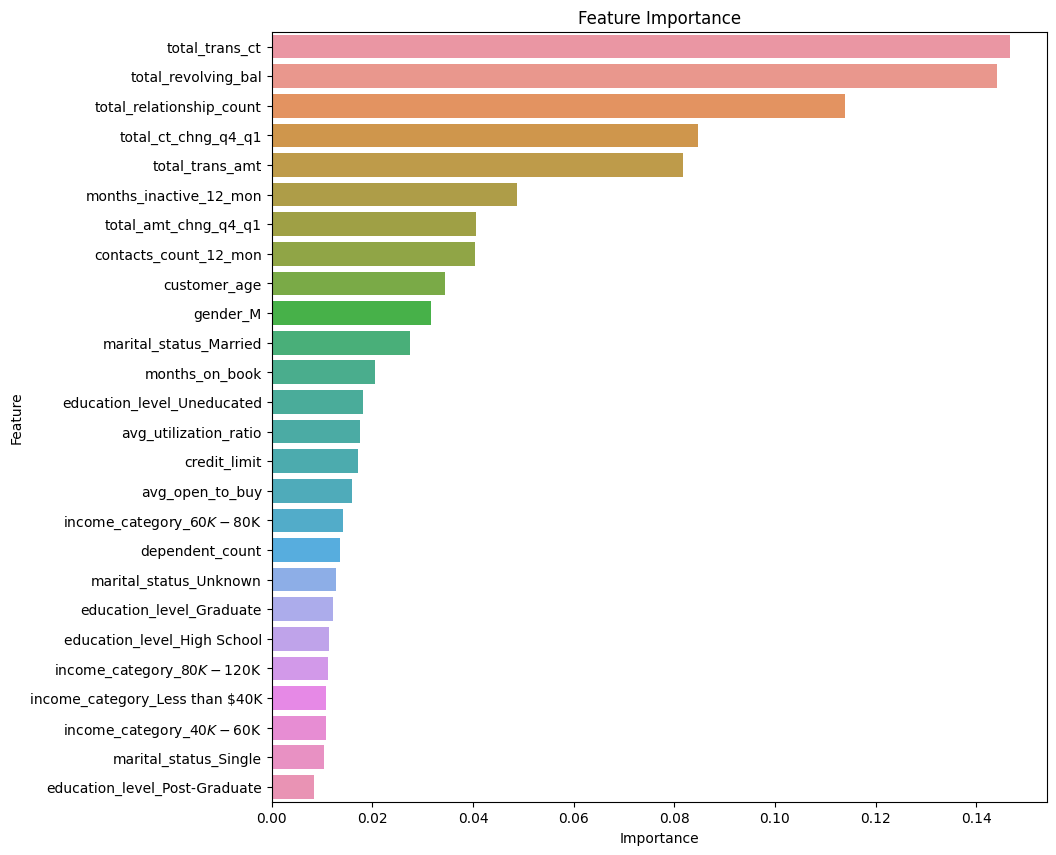

In [80]:
# Get feature importances
importances = best_xgb.feature_importances_

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h')
plt.title('Feature Importance')
plt.show()

## Interpretación con Shap del mejor modelo hasta el momento

In [81]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 19.3 MB/s eta 0:00:00


In [82]:
import shap 

In [83]:
# Definir el explainer
explainer = shap.Explainer(best_xgb)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


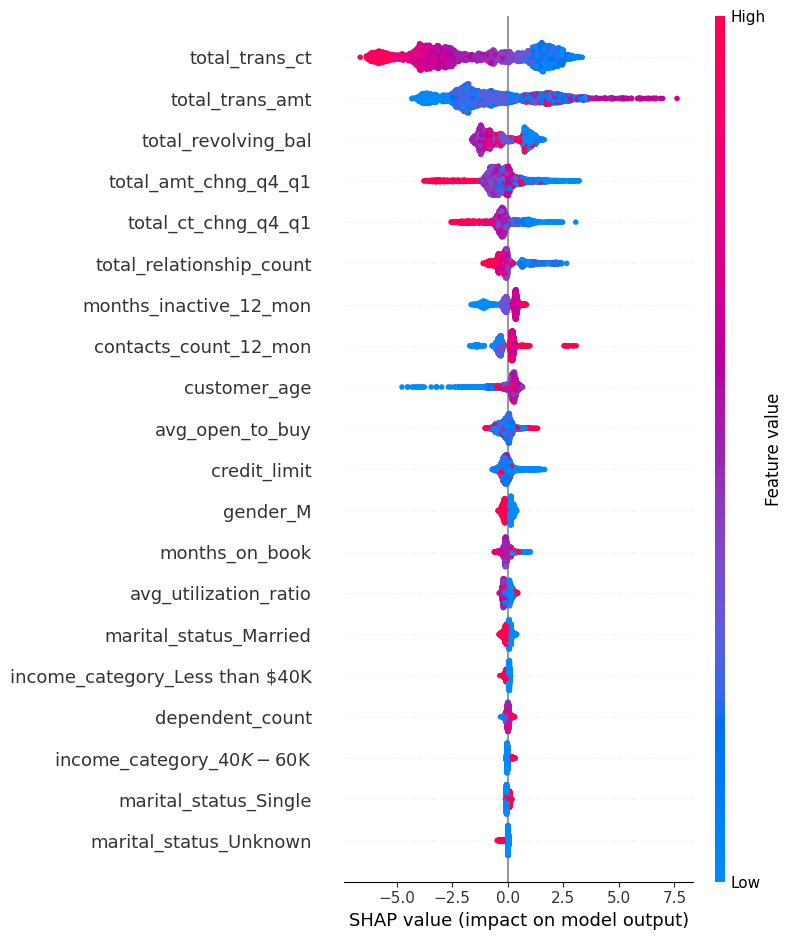

In [84]:
#Obtener la importancia de las variables
shap_values_test = explainer(X_test[selected_feature_names])

# Plot a SHAP summary plot
shap.summary_plot(shap_values_test, X_test[selected_feature_names], feature_names=selected_feature_names)

## Red Neuronal En TensorFlow

In [85]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [86]:
# Estandarización de Datos
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [87]:
print("Shape of input data (X):", X_train_scale.shape)  # should print (7088, 31)
print("Shape of output data (y):", y_train.shape)  # should print (7088,)

Shape of input data (X): (7088, 31)
Shape of output data (y): (7088,)


In [88]:
# Definir la arquitectura de la red
model = tf.keras.Sequential([
    tf.keras.layers.Dense(31, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scale, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
_, test_accuracy = model.evaluate(X_test_scale, y_test, verbose=0)
print("Test accuracy:", test_accuracy)


Epoch 1/100
222/222 - 2s - loss: 0.2692 - accuracy: 0.8918 - 2s/epoch - 10ms/step
Epoch 2/100
222/222 - 1s - loss: 0.1996 - accuracy: 0.9190 - 643ms/epoch - 3ms/step
Epoch 3/100
222/222 - 1s - loss: 0.1761 - accuracy: 0.9258 - 640ms/epoch - 3ms/step
Epoch 4/100
222/222 - 1s - loss: 0.1600 - accuracy: 0.9359 - 677ms/epoch - 3ms/step
Epoch 5/100
222/222 - 1s - loss: 0.1534 - accuracy: 0.9382 - 634ms/epoch - 3ms/step
Epoch 6/100
222/222 - 1s - loss: 0.1450 - accuracy: 0.9426 - 743ms/epoch - 3ms/step
Epoch 7/100
222/222 - 1s - loss: 0.1396 - accuracy: 0.9431 - 571ms/epoch - 3ms/step
Epoch 8/100
222/222 - 1s - loss: 0.1301 - accuracy: 0.9472 - 581ms/epoch - 3ms/step
Epoch 9/100
222/222 - 1s - loss: 0.1310 - accuracy: 0.9457 - 592ms/epoch - 3ms/step
Epoch 10/100
222/222 - 1s - loss: 0.1208 - accuracy: 0.9523 - 596ms/epoch - 3ms/step
Epoch 11/100
222/222 - 1s - loss: 0.1189 - accuracy: 0.9529 - 562ms/epoch - 3ms/step
Epoch 12/100
222/222 - 1s - loss: 0.1134 - accuracy: 0.9534 - 603ms/epoch - 

Epoch 1/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0215 - val_accuracy: 0.9922
Epoch 2/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.0192 - val_accuracy: 0.9894
Epoch 3/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0216 - val_accuracy: 0.9901
Epoch 4/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0238 - val_accuracy: 0.9901
Epoch 5/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0297 - val_accuracy: 0.9880
Epoch 6/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.1321 - val_accuracy: 0.9669
Epoch 7/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.0917 - val_accuracy: 0.9704

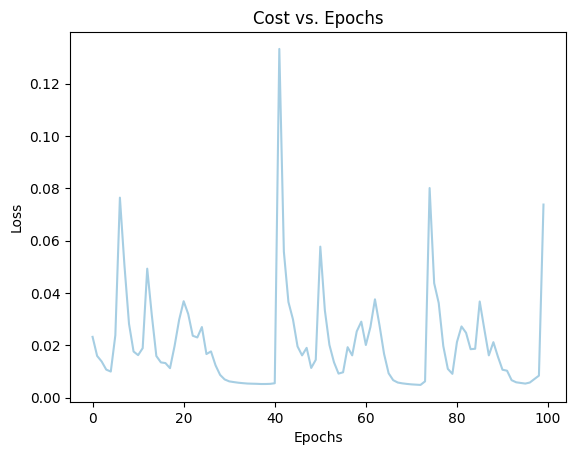

In [89]:
# Train the model and store the training history
history = model.fit(X_train_scale, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the cost vs. epochs curve
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epochs')
plt.show()

In [90]:
# Evaluar el modelo
model.evaluate(X_test_scale, y_test)

95/95 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.9164


[0.5916875004768372, 0.9164198637008667]

In [91]:
# Desempeño en test
test_loss, test_accuracy = model.evaluate(X_test_scale, y_test)
print(f"Test accuracy: {test_accuracy}")

95/95 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.9164
Test accuracy: 0.9164198637008667


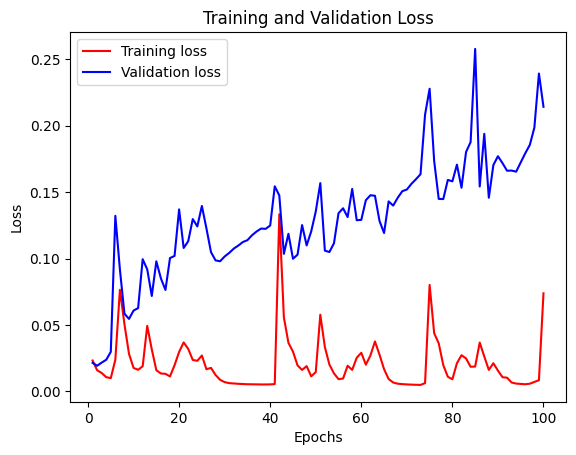

In [92]:
# Ver la evolución de las métricas del modelo
def plot_training_and_validation_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()


plot_training_and_validation_loss(history)

In [93]:
y_pred_dnn_1 = model.predict(X_test_scale)

95/95 [==============================] - 0s 2ms/step


In [94]:
# ROC AUC
false_positives_rate_dnn_1, true_positives_rate_dnn_1, threshold_dnn_1 = roc_curve(y_test, y_pred_dnn_1)

In [95]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_dnn_1))

AUC Score:  0.9550069450610785


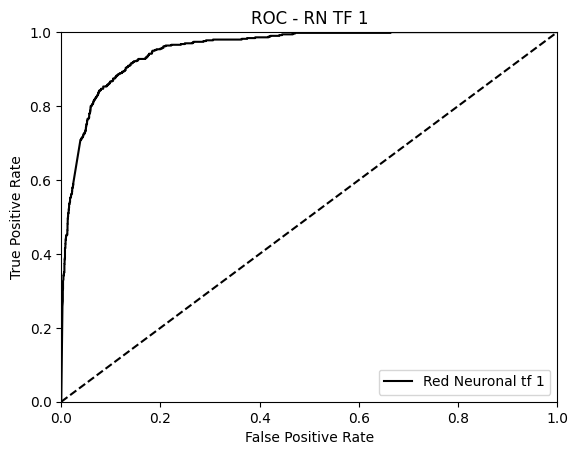

In [96]:
# Curva ROC

plt.title('ROC - RN TF 1')

plt.plot(false_positives_rate_dnn_1, true_positives_rate_dnn_1, color='black', label = 'Red Neuronal tf 1')

plt.plot([0, 1], color='black', ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

In [97]:
threshold = 0.5
y_pred_dnn_1_binary = (y_pred_dnn_1 >= threshold).astype(int)

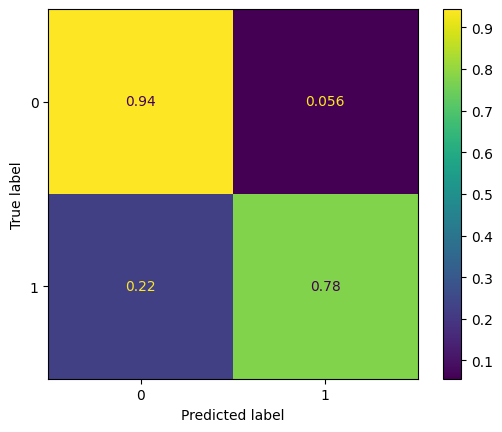

In [98]:
# Matriz de confusión de la Red Neuronal
cm = confusion_matrix(y_test, y_pred_dnn_1_binary, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

## Red Neuronal con Hiperparámetros

In [99]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.5 MB/s eta 0:00:00


In [100]:
from keras_tuner import HyperModel
from tensorflow.keras.models import Sequential
from keras_tuner.tuners import RandomSearch, Hyperband

In [101]:
class BestModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        # Define the neural network model architecture
        model = Sequential()
        model.add(tf.keras.layers.Dense(units=16, activation="relu", input_shape=self.input_shape))

        # Define the number of layers using a hyperparameter
        num_layers = hp.Int("num_layers", min_value=1, max_value=3)

        # Define the dropout rate using a hyperparameter
        dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)

        # Define each layer in the neural network
        for i in range(num_layers):
            # Define the number of neurons in this layer using a hyperparameter
            num_neurons = hp.Int(f"dense_units_{i}", min_value=8, max_value=128, step=32)

            # Add the layer to the model with the specified number of neurons and activation function
            model.add(tf.keras.layers.Dense(units=num_neurons, activation="relu"))

            # Add a dropout layer after each dense layer
            model.add(tf.keras.layers.Dropout(dropout_rate))

        # Define the output layer of the neural network
        model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

        # Define the optimizer and learning rate using a hyperparameter
        learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        # Compile the model with the optimizer, loss function, and metric
        model.compile(optimizer=optimizer,
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

        return model

In [102]:
# Define 'Hypermodel' and 'BestModel'
input_shape = X_train.shape[1:]
hypermodel = BestModel(input_shape)

In [103]:
# Optimization of the Random Search algorithm
tuner = Hyperband(hypermodel,
                  objective='val_accuracy',
                  max_epochs=50,
                  directory="tuner_results")

In [104]:
# Define an Early Stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [105]:
# Define a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [106]:
# Start the hyperparameter search. 
tuner.search(X_train_scale, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback, tensorboard_callback])

Trial 90 Complete [00h 00m 18s]
val_accuracy: 0.9351198673248291

Best val_accuracy So Far: 0.9407616257667542
Total elapsed time: 00h 14m 18s


In [107]:
# Retrieve the best hyperparameters found during the search.
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [108]:
# Values of the best hyperparameters
best_hps.values

{'num_layers': 1,
 'dropout_rate': 0.4,
 'dense_units_0': 40,
 'learning_rate': 0.00565333689358791,
 'dense_units_1': 104,
 'dense_units_2': 72,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0052'}

In [109]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
hp_history = model.fit(X_train_scale, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/50
178/178 [==============================] - 2s 4ms/step - loss: 0.3228 - accuracy: 0.8718 - val_loss: 0.2641 - val_accuracy: 0.8970
Epoch 2/50
178/178 [==============================] - 1s 4ms/step - loss: 0.2330 - accuracy: 0.9051 - val_loss: 0.2157 - val_accuracy: 0.9175
Epoch 3/50
178/178 [==============================] - 1s 3ms/step - loss: 0.2039 - accuracy: 0.9196 - val_loss: 0.2087 - val_accuracy: 0.9175
Epoch 4/50
178/178 [==============================] - 1s 3ms/step - loss: 0.1934 - accuracy: 0.9240 - val_loss: 0.1748 - val_accuracy: 0.9316
Epoch 5/50
178/178 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9293 - val_loss: 0.1759 - val_accuracy: 0.9337
Epoch 6/50
178/178 [==============================] - 1s 3ms/step - loss: 0.1698 - accuracy: 0.9300 - val_loss: 0.1771 - val_accuracy: 0.9288
Epoch 7/50
178/178 [==============================] - 1s 3ms/step - loss: 0.1667 - accuracy: 0.9337 - val_loss: 0.1792 - val_accuracy: 0.9238
Epoch 

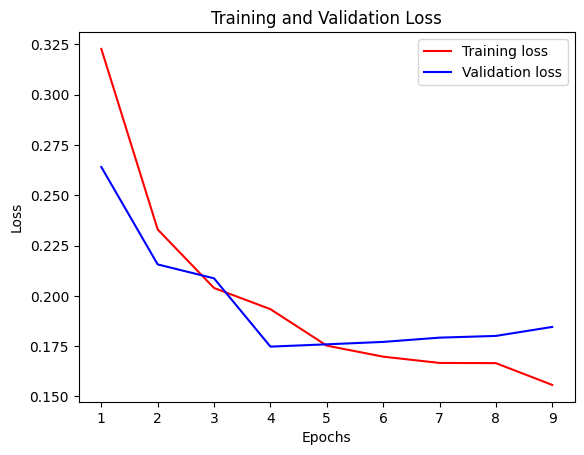

In [110]:
plot_training_and_validation_loss(hp_history)

In [111]:
eval_result = model.evaluate(X_test_scale, y_test)
print("[test loss, test accuracy]:", eval_result)

95/95 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9191
[test loss, test accuracy]: [0.19868455827236176, 0.9190523028373718]


In [112]:
y_pred_dnn_2 = model.predict(X_test_scale)

95/95 [==============================] - 0s 2ms/step


In [113]:
# ROC AUC
false_positives_rate_dnn_2, true_positives_rate_dnn_2, threshold_dnn_2 = roc_curve(y_test, y_pred_dnn_2)

In [114]:
print('AUC Score: ', roc_auc_score(y_test, y_pred_dnn_2))

AUC Score:  0.9540079979196531


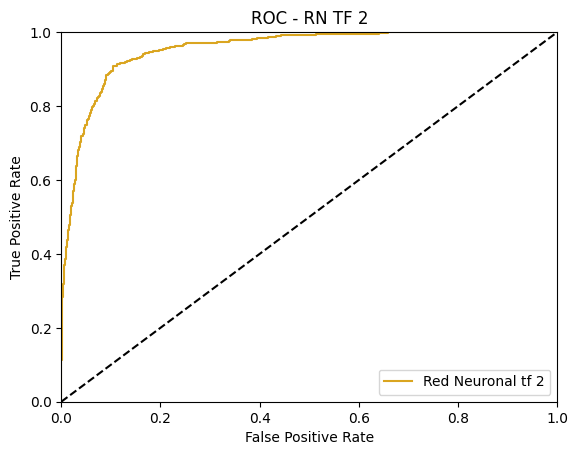

In [115]:
# Curva ROC

plt.title('ROC - RN TF 2')

plt.plot(false_positives_rate_dnn_2, true_positives_rate_dnn_2, color='goldenrod', label = 'Red Neuronal tf 2')

plt.plot([0, 1], color='black', ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

In [116]:
threshold = 0.5
y_pred_dnn_2_binary = (y_pred_dnn_2 >= threshold).astype(int)

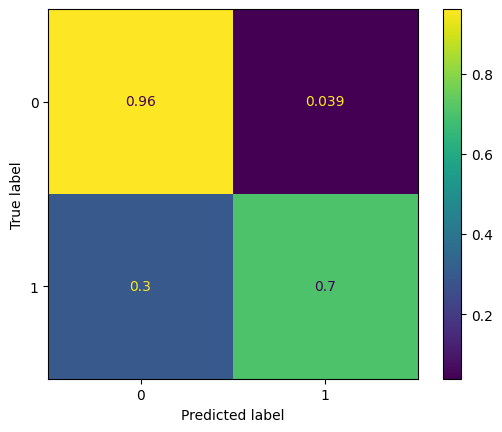

In [117]:
# Matriz de confusión de la Red Neuronal
cm = confusion_matrix(y_test, y_pred_dnn_2_binary, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

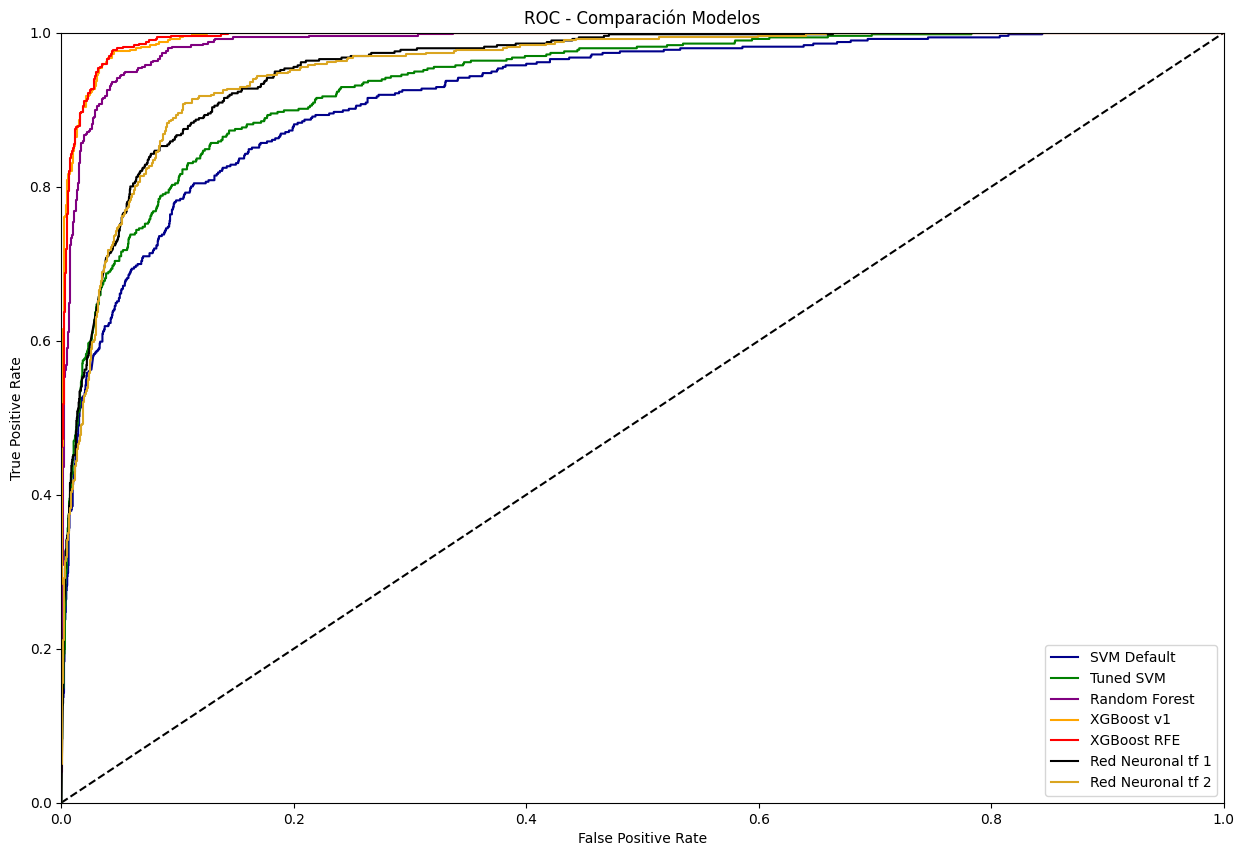

In [118]:
plt.figure(figsize = (15, 10))
plt.title('ROC - Comparación Modelos')

plt.plot([0, 1], color='black', ls="--")
plt.plot(false_positives_rate, true_positives_rate, color='darkblue', label = 'SVM Default')
plt.plot(false_positives_rate_hp, true_positives_rate_hp, color='green', label = 'Tuned SVM')
plt.plot(false_positives_rate_rf, true_positives_rate_rf, color='purple', label = 'Random Forest')
plt.plot(false_positives_rate_xgb, true_positives_rate_xgb, color='orange', label = 'XGBoost v1')
plt.plot(false_positives_rate_xgb_rfe, true_positives_rate_xgb_rfe, color='red', label = 'XGBoost RFE')
plt.plot(false_positives_rate_dnn_1, true_positives_rate_dnn_1, color='black', label = 'Red Neuronal tf 1')
plt.plot(false_positives_rate_dnn_2, true_positives_rate_dnn_2, color='goldenrod', label = 'Red Neuronal tf 2')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()